<a href="https://colab.research.google.com/github/chelynl/Machine_Learning/blob/main/ML_Method_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN

In [8]:
# Import Data
from google.colab import files 
import pandas as pd 
import io 

# Data Wrangling and Plotting
import numpy as np
import matplotlib.pyplot as plt

# KNN
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier

# Accuracy Metrics
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error, classification_report, confusion_matrix, plot_confusion_matrix, roc_curve, auc

In [2]:
uploaded = files.upload()

Saving reduced_test.csv to reduced_test.csv
Saving reduced_train.csv to reduced_train.csv
Saving reduced_train_valid.csv to reduced_train_valid.csv
Saving reduced_valid.csv to reduced_valid.csv


### We are working with the compressed version of the data.

### The following has already been done to the data:
- selected only the important features that contributed to 95% of cumulative importance (from RF)
- reduced data to first 10 principal components (from PCA)

In [3]:
train_df = pd.read_csv(io.BytesIO(uploaded['reduced_train.csv'])) 
valid_df = pd.read_csv(io.BytesIO(uploaded['reduced_valid.csv']))
train_valid_df = pd.read_csv(io.BytesIO(uploaded['reduced_train_valid.csv']))
test_df = pd.read_csv(io.BytesIO(uploaded['reduced_test.csv']))

Separate the inputs (attributes) from the output (target).

In [4]:
# Get inputs and outputs as separate dfs on training data
X_train = train_df.drop(['binary.target2'], axis=1)
y_train = train_df['binary.target2']

# Repeat for validation data
X_valid = valid_df.drop(['binary.target2'], axis=1)
y_valid = valid_df['binary.target2']

# Convert input and output dfs to arrays for sklearn
X_train = np.array(X_train)
y_train = np.ravel(np.array(y_train))

# Repeat for validation data
X_valid = np.array(X_valid)
y_valid = np.ravel(np.array(y_valid))

Make a preliminary KNN model, starting with 5 neighbors. Check the default confusion matrix and classification metrics. We will fine tune after.

In [5]:
# Instantiate a KNN class with k=5 to start
knn = KNeighborsClassifier(n_neighbors=5)

# Fit KNN to the training data
knn_model = knn.fit(X_train, y_train)

# make predictions on validation data
y_pred = knn.predict(X_valid)

# Confusion Matrix
print(confusion_matrix(y_valid, y_pred))

# More classification metrics
print(classification_report(y_valid, y_pred))

# Compute the misclassification rate (mean error rate)
print('Misclassification Rate: ', np.mean(y_pred!=y_valid))

[[70184 12700]
 [10871  6245]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86     82884
           1       0.33      0.36      0.35     17116

    accuracy                           0.76    100000
   macro avg       0.60      0.61      0.60    100000
weighted avg       0.77      0.76      0.77    100000

Misclassification Rate:  0.23571


We will loop through values 1-60 as k to train multiple models and choose the final number of neighbors based on the model that produces the least error.

Text(0, 0.5, 'Mean Error')

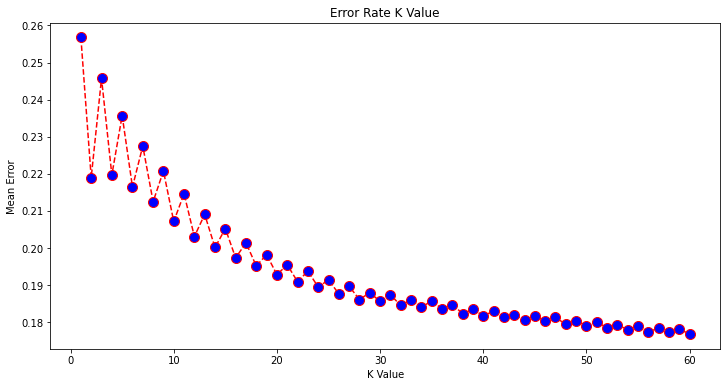

In [ ]:
# K values
k_vals = range(1, 61)

# Empty list to store errors
error = []

# Calculate error for K values between 1 and 60
for i in k_vals:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_valid)
  error.append(np.mean(pred_i != y_valid))

# Get min error
error_min = np.min(error)

# Find K that produces the least error
best_k = k_vals[error.index(error_min)]

# Plot the error values against K values
plt.figure(figsize=(12,6))
plt.plot(k_vals, 
         error, 
         color='red', 
         linestyle='dashed', 
         marker='o', 
         markerfacecolor='blue', 
         markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [6]:
# KNN with 20 neighbors
knn = KNeighborsClassifier(n_neighbors=20)

# Fit KNN to training data
knn.fit(X_train, y_train)

# Make predictions on validation data
y_pred = knn.predict(X_valid)

# Confusion matrix
print(confusion_matrix(y_valid, y_pred))

# More classification metrics
print(classification_report(y_valid, y_pred))

# Compute the misclassification rate
print('Misclassification Rate: ', np.mean(y_pred!=y_valid))

[[75383  7501]
 [11779  5337]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89     82884
           1       0.42      0.31      0.36     17116

    accuracy                           0.81    100000
   macro avg       0.64      0.61      0.62    100000
weighted avg       0.79      0.81      0.80    100000

Misclassification Rate:  0.1928


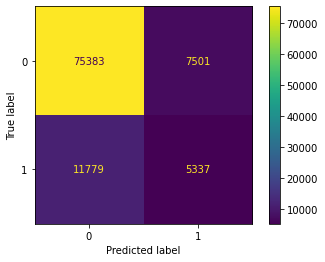

In [7]:
# Final confusion matrix
plot_confusion_matrix(knn,
                      X_valid,
                      y_valid,
                      values_format='d')

In [9]:
# Function to evaluate model
def evaluate(model, test_features, test_labels):
  predictions = model.predict(test_features)
  accuracy = accuracy_score(test_labels, predictions)*100
  FPR, TPR, thresholds = roc_curve(test_labels, predictions)
  roc_auc = auc(FPR, TPR)
  print('Model Performance')
  print('AUC: ', roc_auc)
  print('Accuracy = {:0.2f}%.'.format(accuracy))

In [10]:
# Final KNN results
evaluate(knn, X_valid, y_valid)

Model Performance
AUC:  0.6106567659795207
Accuracy = 80.72%.
